<a href="https://colab.research.google.com/github/wgova/time_series_trade/blob/cheat-code-kmeans/notebooks/k_means_tslearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-means
=======

This example uses :math:`k`-means clustering for time series. Three variants of
the algorithm are available: 
- standard Euclidean :math:`k`-means, 
- DBA-:math:`k`-means (for DTW Barycenter Averaging [1])
- Soft-DTW :math:`k`-means [2].

A note on pre-processing
~~~~~~~~~~~~~~~~~~~~~~~~

In this example, time series are preprocessed using
`TimeSeriesScalerMeanVariance`. This scaler is such that each output time
series has zero mean and unit variance.
The assumption here is that the range of a given time series is uninformative
and one only wants to compare shapes in an amplitude-invariant manner (when
time series are multivariate, this also rescales all modalities such that there
will not be a single modality responsible for a large part of the variance).
This means that one cannot scale barycenters back to data range because each
time series is scaled independently and there is hence no such thing as an
overall data range.

[1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method \
for dynamic time warping, with applications to clustering. Pattern \
Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693
[2] M. Cuturi, M. Blondel "Soft-DTW: a Differentiable Loss Function for 
Time-Series," ICML 2017.
"""

_Author: Romain Tavenard_

In [3]:
!pip install tslearn
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

     |████████████████████████████████| 747kB 3.2MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load and prepare data 

In [0]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Train kmeans algorithm
Euclidean k-means

16.434 --> 9.437 --> 9.437 --> 


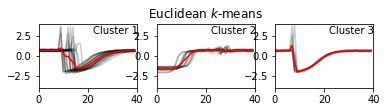

In [8]:
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# k-means clustering : DBA-k-means

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


1.061 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.473 --> 0.473 --> 
Init 2
1.024 --> 0.528 --> 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.457 --> 0.452 --> 0.452 --> 0.452 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


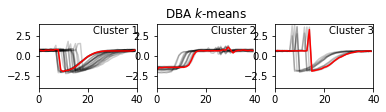

In [9]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")


# k-means clustering: Soft-DTW

2.475 --> 0.158 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.157 --> 0.158 --> 0.157 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 0.156 --> 


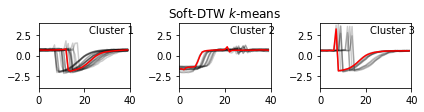

In [10]:
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()